<a href="https://colab.research.google.com/github/syedaftab-dev/Machine-learning/blob/main/1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **# Support *Vector* Classifier Implementation**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
## Lets create syntheric data points
from sklearn.datasets import make_classification


In [ ]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [ ]:
y

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
pd.DataFrame(X)[0]

,0
0,-1.989034
1,3.121313
2,1.517766
3,-0.765371
4,-0.918644
...,...
995,1.457245
996,-1.372902
997,2.437910
998,-0.452035


<Axes: xlabel='0', ylabel='1'>

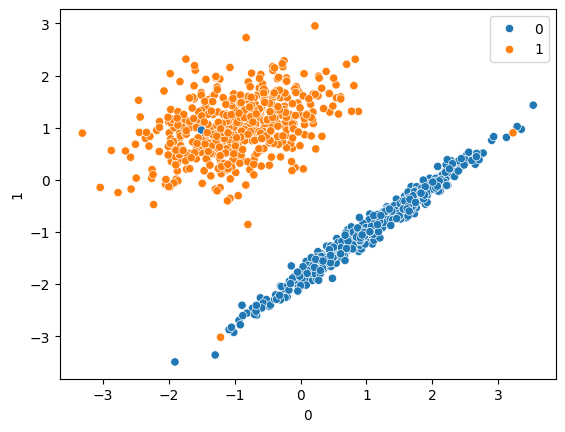

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [ ]:
from sklearn.svm import SVC


In [ ]:
svc = SVC(kernel='linear') # if our dataset is seperated use liner

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
svc.fit(X_train,y_train
)

SVC(kernel='linear')

In [ ]:
# prediction
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       120

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[130   0]
 [  0 120]]


the accuracy is 100% as the points were seperated perfectly


**What if the points are overlapping Lets take another dataset with overlapping points and see accuracy**

In [ ]:
from sklearn.datasets import make_classification


<Axes: xlabel='0', ylabel='1'>

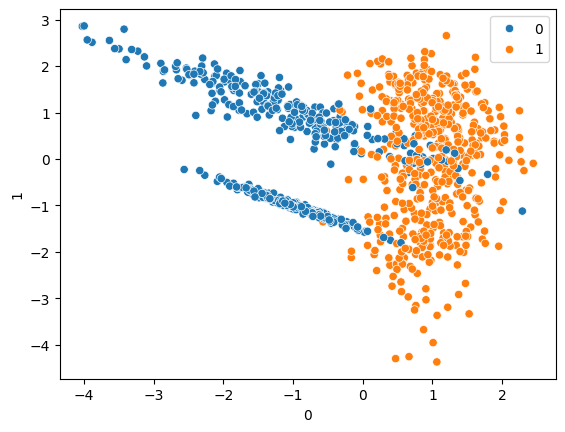

In [ ]:
X1,y1 = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)
sns.scatterplot(x=pd.DataFrame(X1)[0], y=pd.DataFrame(X1)[1], hue=y1)

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25,random_state=10)

In [ ]:
rbf = SVC(kernel='rbf')

In [ ]:
rbf.fit(X1_train,y1_train)

SVC()

In [ ]:
y_pred1 = rbf.predict(X1_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       123
           1       0.93      0.98      0.95       127

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[114   9]
 [  3 124]]


accuracy has been decreased to 95%

**Lets try using another kernel named - polynomial**

In [ ]:
polynomial = SVC(kernel='poly')

In [ ]:
polynomial.fit(X1_train,y1_train)

SVC(kernel='poly')

In [ ]:
y_pred2 = rbf.predict(X1_test)

In [ ]:
print(classification_report(y1_test,y_pred2))
print(confusion_matrix(y1_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       123
           1       0.93      0.98      0.95       127

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[114   9]
 [  3 124]]


the accuracy when from 97 to 95 here

In [ ]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X1_train,y1_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred3 = sigmoid.predict(X1_test)

In [ ]:
sigmoid.intercept_,

(array([-0.37800193]),)

In [ ]:
print(classification_report(y1_test,y_pred3))
print(confusion_matrix(y1_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       123
           1       0.86      0.81      0.83       127

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

[[106  17]
 [ 24 103]]


The accuracy droped to 84% here

# **Hyperparameter tuninig**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.10,0.001,0.0001],
    'kernel':['rbf']
}

In [ ]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
# prediction
y_pred4 = grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       120

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[130   0]
 [  0 120]]


**Accuracy reached to 100%**

# **SVM KErnels Indepth Intuitionand practical**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.linspace(-5.0,5.0,100)
# will generate no from -5 to 5 with same interval and 100 number
y = np.sqrt(10**2 - x**2)
# equation of circular(parabolic) curves y^2 = 100-x^2
y=np.hstack([y,-y])
# will make an array containing y and then -y elements
x=np.hstack([x,-x])

In [ ]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

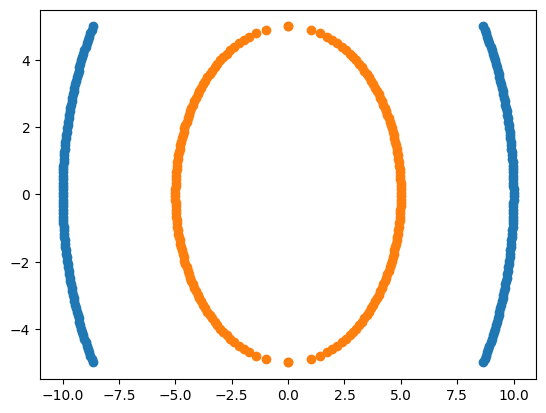

In [ ]:
 plt.scatter(y,x)
 plt.scatter(y1,x1)

# We cannot create the best fit line in b/w it will give error in accuracy

In [ ]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
#  vstack [y,x] elements ko arrange karke fir tranpose liye
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2])
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
# indpendent and dependent featuress
X = df.iloc[:,:2] # 0 to 1 columns
y = df.Y

In [ ]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
y_train

,Y
57,0
87,0
157,1
155,1
38,1
...,...
169,1
120,1
15,0
125,0


# For degree-d polynomial ,the polynomial kernel is defined as

K(x,y) = (X.T y + c)^d

d->polynomial degree

In [ ]:
# we need to find components for the polynomial kernel

df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=(df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [ ]:
# independent and dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [ ]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',color='Y')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2',color='Y')
fig.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)
# the accuracy is 100% but with respect to polyomial we got

1.0

# If we use kernel='poly' we dont need to make X1_Square,X2-square etc manually the poly kernel will automaticlly create it

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)
# we got the same accuracy

1.0

# If we use the kernel=rbf

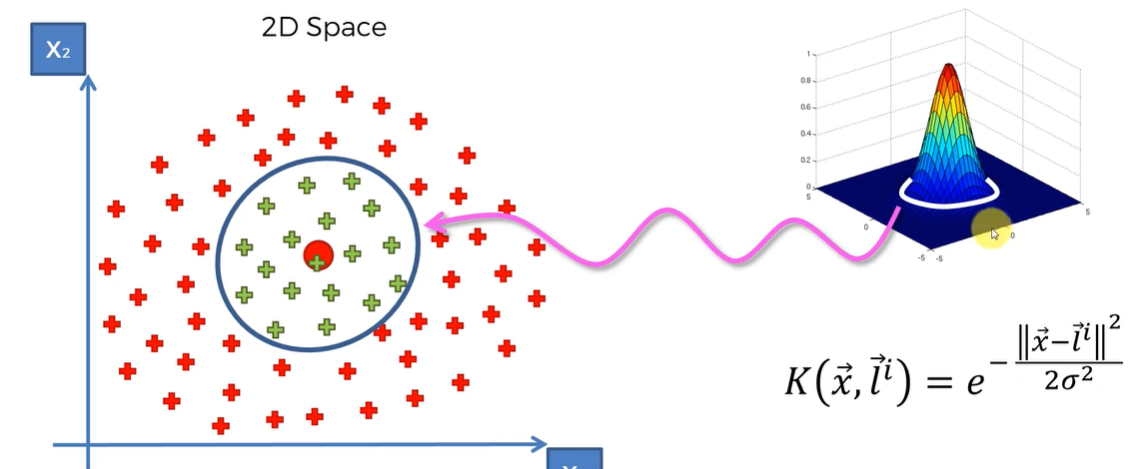

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0